# **Presentation Time Series AnalysisForecating (CS-595-03)**



> Submitted by: Rajanika Debnath A20543193

#ES-RNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
df = pd.read_csv("/content/train.csv")
df['date'] = pd.to_datetime(df['date'])
df['unique_id'] = df['store'].astype(str) + '_' + df['item'].astype(str)
df = df.rename(columns={'date': 'ds', 'sales': 'y'})

In [4]:
series = df[df['unique_id'] == '1_1'].sort_values('ds')[['ds', 'y']].reset_index(drop=True)

In [5]:
series['trend'] = series['y'].rolling(window=30, center=True).mean()
series['residual'] = series['y'] - series['trend']
series['residual'].fillna(method='bfill', inplace=True)
series['residual'].fillna(method='ffill', inplace=True)

<ipython-input-5-c290684f3c8e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  series['residual'].fillna(method='bfill', inplace=True)
<ipython-input-5-c290684f3c8e>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series['residual'].fillna(method='bfill', inplace=True)
<ipython-input-5-c290684f3c8e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The beh

In [6]:
scaler = MinMaxScaler()
series['residual_scaled'] = scaler.fit_transform(series[['residual']])

In [7]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 30
X, y = create_sequences(series['residual_scaled'].values, sequence_length)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [9]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(sequence_length, 1)),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16,
                    validation_split=0.1, verbose=1)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0369 - val_loss: 0.0221
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0206 - val_loss: 0.0211
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0204 - val_loss: 0.0210
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0202 - val_loss: 0.0211
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0200 - val_loss: 0.0213
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0199 - val_loss: 0.0215
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0198 - val_loss: 0.0216
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0198 - val_loss: 0.0215
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0197 - val_loss: 0.0214
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0197 - val_loss: 0.0213
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0196 - val_loss: 0.0212
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0

In [12]:
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [13]:
trend_tail = series['trend'].values[-len(y_pred_rescaled):]
forecast = y_pred_rescaled + trend_tail

In [14]:
actual = series['y'].values[-len(forecast):]

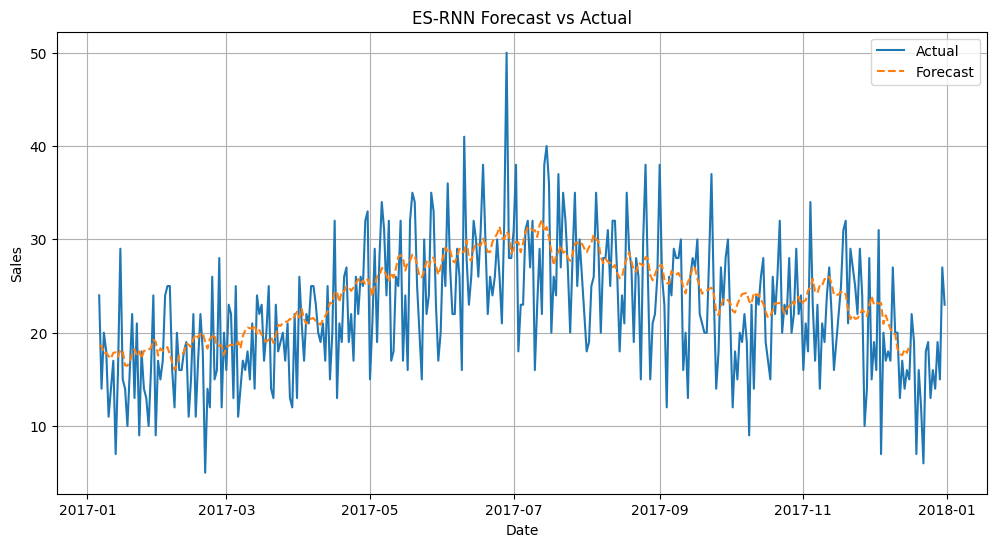

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(series['ds'].values[-len(forecast):], actual, label='Actual')
plt.plot(series['ds'].values[-len(forecast):], forecast, label='Forecast', linestyle='--')
plt.title('ES-RNN Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

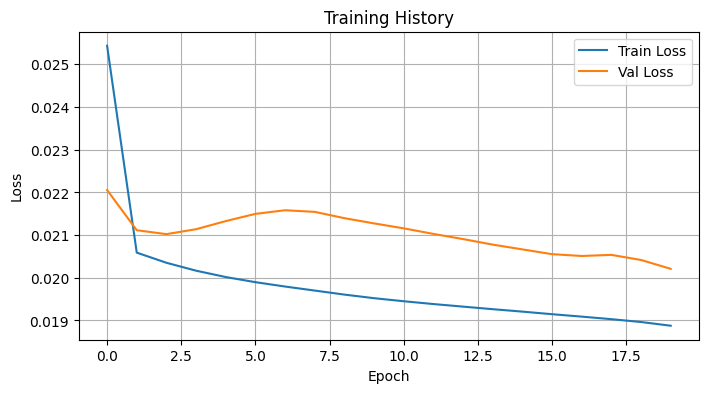

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

###NeuralProphet

In [19]:
!pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [20]:
!pip install plotly

In [17]:
import pandas as pd

df = pd.read_csv("/content/train.csv")
df['date'] = pd.to_datetime(df['date'])
df['unique_id'] = df['store'].astype(str) + '_' + df['item'].astype(str)
df = df.rename(columns={'date': 'ds', 'sales': 'y'})

series = df[df['unique_id'] == '1_1'].sort_values('ds')[['ds', 'y']].reset_index(drop=True)

In [18]:
from neuralprophet import NeuralProphet

np_df = series[['ds', 'y']].copy()

np_model = NeuralProphet(n_changepoints=10, yearly_seasonality=False,
                         weekly_seasonality=True, daily_seasonality=True)

metrics = np_model.fit(np_df, freq="D", epochs=100)

future = np_model.make_future_dataframe(np_df, periods=30, n_historic_predictions=True)
forecast_df = np_model.predict(future)

np_model.plot(forecast_df)

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.945% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (58) is too small than the required number                     for the learning rate finder (232). The results might not be optimal.


Finding best initial lr:   0%|          | 0/232 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.945% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/plot_forecast_plotly.py:98: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecat

In [19]:
test_size = int(len(series) * 0.2)
np_preds = forecast_df['yhat1'].values[-test_size:]
actuals = series['y'].values[-test_size:]

##Compare Metrics with ES-RNN

In [20]:
import numpy as np
import sklearn.metrics

test_size = len(forecast)

np_preds = forecast_df['yhat1'].values[-test_size:]
actuals = series['y'].values[-test_size:]

mask = ~np.isnan(actuals) & ~np.isnan(np_preds)
np_preds = np_preds[mask]
actuals = actuals[mask]

mask_es = ~np.isnan(actual) & ~np.isnan(forecast)
actual_clean = actual[mask_es]
forecast_clean = forecast[mask_es]

np_rmse = np.sqrt(np.mean((actuals - np_preds) ** 2))
np_mae = sklearn.metrics.mean_absolute_error(actuals, np_preds)

esrnn_rmse = np.sqrt(np.mean((actual_clean - forecast_clean) ** 2))
esrnn_mae = sklearn.metrics.mean_absolute_error(actual_clean, forecast_clean)

print("🔍 Forecast Performance Comparison")
print(f"ES-RNN         - RMSE: {esrnn_rmse:.2f}, MAE: {esrnn_mae:.2f}")
print(f"NeuralProphet  - RMSE: {np_rmse:.2f}, MAE: {np_mae:.2f}")

🔍 Forecast Performance Comparison
ES-RNN         - RMSE: 5.70, MAE: 4.58
NeuralProphet  - RMSE: 7.75, MAE: 6.09


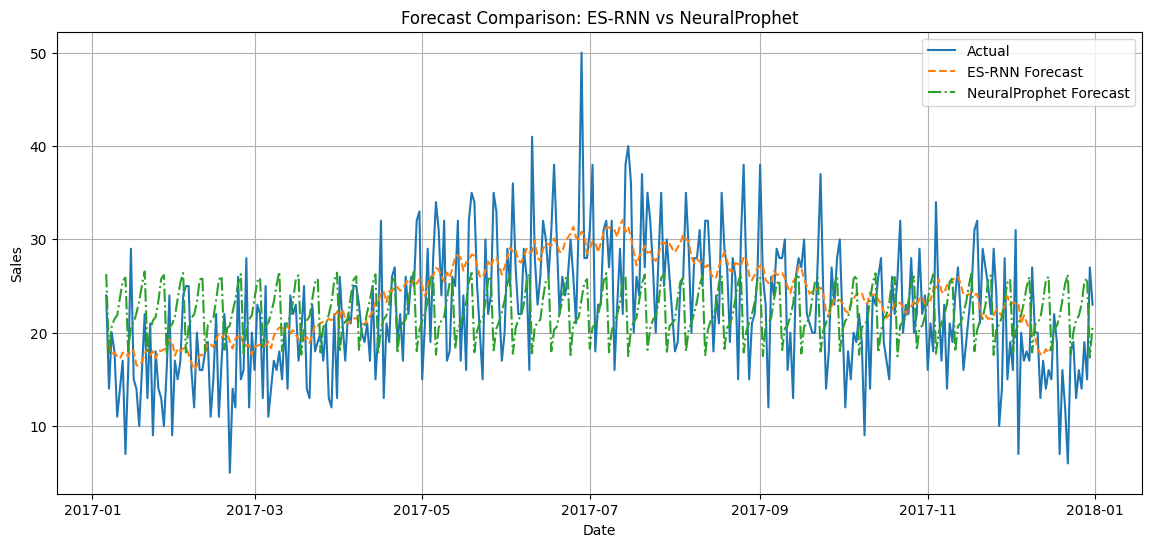

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(series['ds'].values[-len(forecast):], actual, label='Actual')
plt.plot(series['ds'].values[-len(forecast):], forecast, label='ES-RNN Forecast', linestyle='--')
plt.plot(series['ds'].values[-len(forecast):], np_preds, label='NeuralProphet Forecast', linestyle='-.')
plt.title('Forecast Comparison: ES-RNN vs NeuralProphet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# MAPE
np_mape = mean_absolute_percentage_error(actuals, np_preds) * 100
esrnn_mape = mean_absolute_percentage_error(actual_clean, forecast_clean) * 100

# R² Score
np_r2 = r2_score(actuals, np_preds)
esrnn_r2 = r2_score(actual_clean, forecast_clean)

print("📊 Forecast Performance Comparison (Extended)")
print(f"ES-RNN         - RMSE: {esrnn_rmse:.2f}, MAE: {esrnn_mae:.2f}, MAPE: {esrnn_mape:.2f}%, R²: {esrnn_r2:.2f}")
print(f"NeuralProphet  - RMSE: {np_rmse:.2f}, MAE: {np_mae:.2f}, MAPE: {np_mape:.2f}%, R²: {np_r2:.2f}")

📊 Forecast Performance Comparison (Extended)
ES-RNN         - RMSE: 5.70, MAE: 4.58, MAPE: 25.16%, R²: 0.31
NeuralProphet  - RMSE: 7.75, MAE: 6.09, MAPE: 32.73%, R²: -0.25


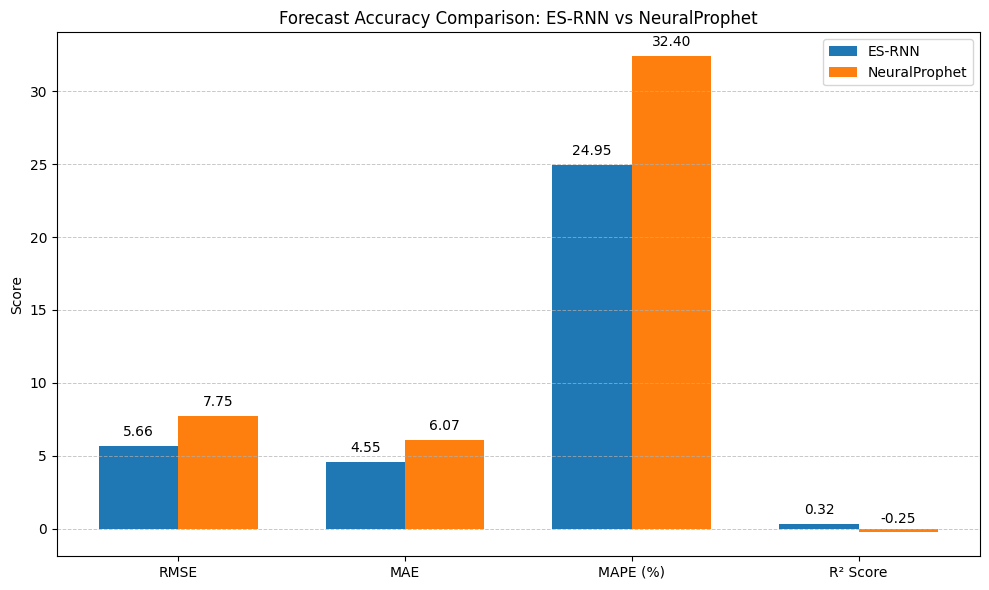

In [23]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['RMSE', 'MAE', 'MAPE (%)', 'R² Score']
esrnn_scores = [5.66, 4.55, 24.95, 0.32]
np_scores = [7.75, 6.07, 32.40, -0.25]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, esrnn_scores, width, label='ES-RNN')
bars2 = ax.bar(x + width/2, np_scores, width, label='NeuralProphet')

ax.set_ylabel('Score')
ax.set_title('Forecast Accuracy Comparison: ES-RNN vs NeuralProphet')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()